In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [3]:
# load your own set, and DrugBank :)
with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        # get the standardized pChEMBL activity measure for future use
        pchembl = m['pChEMBL Value']
        if not pchembl:
            # some don't have any comparable pChEMBL value, just assign them very low value
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl)) # save the value into mol instance
        mtor_ligands.append(mol)

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

[12:26:48] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[12:26:48] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[12:26:49] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:26:49] ERROR: Could not sanitize molecule ending on line 250947
[12:26:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:26:49] Explicit valence for atom # 17 O, 2, is greater than permitted
[12:26:49] ERROR: Could not sanitize molecule ending on line 258130
[12:26:49] ERROR: Explicit valence for atom # 17 O, 2, is greater than permitted
[12:26:49] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:26:49] ERROR: Could not sanitize molecule ending on line 261581
[12:26:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:26:49] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[12:26:49] ERROR: Could not 

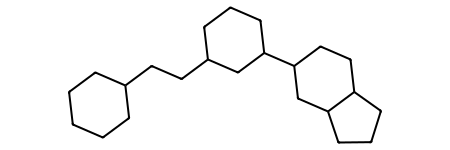

In [86]:
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(mtor_ligands[0])
scaffold1

scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
scaffold3

In [83]:
def scaffold(mol):
    try:
        scaffold1 = MurckoScaffold.MakeScaffoldGeneric(mol)
        scaffold2 = MurckoScaffold.GetScaffoldForMol(scaffold1)
    except ValueError:
        return None

    return Chem.MolToSmiles(scaffold2)

In [84]:
scaffold(mol)

ArgumentError: Python argument types in
    Mol.__init__(Mol, NoneType)
did not match C++ signature:
    __init__(struct _object * __ptr64 self, class RDKit::ROMol mol, bool quickCopy=False, int confId=-1)
    __init__(struct _object * __ptr64 self, class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > pklString, unsigned int propertyFlags)
    __init__(struct _object * __ptr64 self, class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > pklString)
    __init__(struct _object * __ptr64 self)

In [53]:
s = [scaffold(m) for m in drugs]

[12:47:01] Explicit valence for atom # 90 C, 6, is greater than permitted
[12:47:01] Explicit valence for atom # 62 C, 6, is greater than permitted
[12:47:01] Explicit valence for atom # 11 C, 8, is greater than permitted
[12:47:01] Explicit valence for atom # 6 C, 6, is greater than permitted
[12:47:03] Explicit valence for atom # 31 C, 6, is greater than permitted
[12:47:04] Explicit valence for atom # 14 C, 10, is greater than permitted
[12:47:05] Explicit valence for atom # 37 C, 6, is greater than permitted
[12:47:05] Explicit valence for atom # 23 C greater than permitted
[12:47:05] Explicit valence for atom # 1 C, 6, is greater than permitted
[12:47:06] Explicit valence for atom # 7 C, 5, is greater than permitted
[12:47:06] Explicit valence for atom # 3 C, 6, is greater than permitted
[12:47:06] Explicit valence for atom # 40 C, 6, is greater than permitted
[12:47:06] Explicit valence for atom # 1 C, 6, is greater than permitted
[12:47:06] Explicit valence for atom # 31 C, 6, i

In [54]:
len(s)

7120

In [55]:
from collections import Counter

In [56]:
counter = Counter(s)

In [57]:
counter.most_common(10)

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 169),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106)]

In [58]:
from collections import ChainMap

In [61]:
drugbank_scaffolds = [scaffold(drug) for drug in drugs]
drugbank_scaffolds[:20]

[12:53:22] Explicit valence for atom # 90 C, 6, is greater than permitted
[12:53:22] Explicit valence for atom # 62 C, 6, is greater than permitted
[12:53:22] Explicit valence for atom # 11 C, 8, is greater than permitted
[12:53:22] Explicit valence for atom # 6 C, 6, is greater than permitted
[12:53:24] Explicit valence for atom # 31 C, 6, is greater than permitted
[12:53:24] Explicit valence for atom # 14 C, 10, is greater than permitted
[12:53:26] Explicit valence for atom # 37 C, 6, is greater than permitted
[12:53:26] Explicit valence for atom # 23 C greater than permitted
[12:53:26] Explicit valence for atom # 1 C, 6, is greater than permitted
[12:53:27] Explicit valence for atom # 7 C, 5, is greater than permitted
[12:53:27] Explicit valence for atom # 3 C, 6, is greater than permitted
[12:53:27] Explicit valence for atom # 40 C, 6, is greater than permitted
[12:53:27] Explicit valence for atom # 1 C, 6, is greater than permitted
[12:53:27] Explicit valence for atom # 31 C, 6, i

['C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1',
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1',
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1',
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1',
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1',
 'C1CCCCC1',
 None,
 'C1CCC(CCC2CCC3CCCCC3C2)CC1',
 'C1CCCC1',
 'C1CCC2C(C1)CCC2C1CCCC1',
 '',
 'C1CCCCC1',
 'C1CC2CCCC2C1',
 '',
 '',
 '',
 'C1CCCC1',
 '']

In [81]:
drugbank_scaffolds_smiles = [(i, mol) for i, mol in enumerate(drugbank_scaffolds) if mol]
drugbank_scaffolds_smiles[:20]

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'),
 (5, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (6, 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1'),
 (7, 'C1CCCCC1'),
 (9, 'C1CCC(CCC2CCC3CCCCC3C2)CC1'),
 (10, 'C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (13, 'C1CCCCC1'),
 (14, 'C1CC2CCCC2C1'),
 (18, 'C1CCCC1'),
 (23, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (27, 'C1CCCCC1'),
 (28, 'C1CCC(CCC2CCCC3CCCC32)CC1'),
 (29, 'C1CCC(CCCCCCCCCCCCCCCCCCC2CCCCC2)CC1'),
 (32, 'C1CCC2CC3CCCCC3CC2C1'),
 (38, 'C1CCC(CCC2CCCC3CCCC32)CC1')]

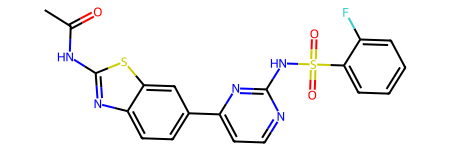

In [87]:
mtor_ligands[0]

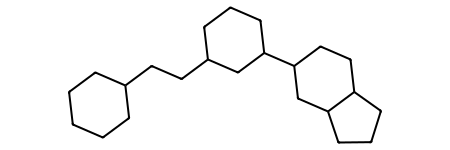

In [88]:
scaffold3

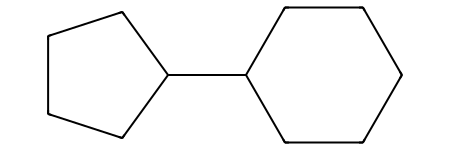

In [68]:
Chem.MolFromSmiles(scaffold(mol))


In [76]:
highlight_scaffold = mol.GetSubstructMatch(Chem.MolFromSmiles(scaffold(mol)))
Draw.Mols(mol, highlightAtomLists = highlight_scaffold)

AttributeError: module 'rdkit.Chem.Draw' has no attribute 'Mols'

In [80]:
mol

In [89]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

# Define the molecule (example: Sildenafil)

# Convert SMILES to RDKit Molecule object
mol = mtor_ligands[0]

# Generate the scaffold
scaffold = scaffold3

# Draw both
img_mol = Draw.MolToImage(mol, size=(300, 300))
img_scaffold = Draw.MolToImage(scaffold, size=(300, 300))

# Display images
img_mol.show()
img_scaffold.show()


KeyboardInterrupt: 

In [94]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

mol = mtor_ligands[0]

# Generate the scaffold
scaffold = scaffold3


In [95]:
scaffold_atoms = mol.GetSubstructMatch(scaffold)
scaffold_bonds = [mol.GetBondBetweenAtoms(scaffold_atoms[i], scaffold_atoms[i+1]).GetIdx()
                  for i in range(len(scaffold_atoms)-1) if mol.GetBondBetweenAtoms(scaffold_atoms[i], scaffold_atoms[i+1])]

In [100]:
mol.GetBondBetweenAtoms(scaffold_atoms[i], scaffold_atoms[i+1])

NameError: name 'i' is not defined

In [ ]:

# Get atom and bond indices of the scaffold in the molecule
scaffold_atoms = mol.GetSubstructMatch(scaffold)
scaffold_bonds = [mol.GetBondBetweenAtoms(scaffold_atoms[i], scaffold_atoms[i+1]).GetIdx()
                  for i in range(len(scaffold_atoms)-1) if mol.GetBondBetweenAtoms(scaffold_atoms[i], scaffold_atoms[i+1])]

# Draw the molecule with scaffold highlighted
img = Draw.MolToImage(mol, size=(400, 400), highlightAtoms=scaffold_atoms, highlightBonds=scaffold_bonds)

# Show the image
img.show()


In [101]:
d = Draw.MolDraw2DSVG(500, 500)